In this project we will create certain standards upto which we can predict which crop is suitable for planting with different standards. Using several algorithms we will test the precision and accuracy and use the optimal algorithm to use this project.

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
#loading the dataset
df = pd.read_csv('C:/Users/ckaus/Desktop/Machine Learning/crop_prediction/cpdata.csv')

In [3]:
df

,temperature,humidity,ph,rainfall,labels
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   labels       3100 non-null   object 
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


In [5]:
df.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


In [6]:
#reading the labels and their count
df["labels"].value_counts()

rice            100
Moth Beans      100
pomegranate     100
papaya          100
orange          100
muskmelon       100
mango           100
apple           100
grapes          100
banana          100
Chickpea        100
Pigeon Peas     100
Adzuki Beans    100
Black gram      100
Coconut         100
Kidney Beans    100
wheat           100
Tobacco         100
Sugarcane       100
Rubber          100
Peas            100
Ground Nut      100
Cotton          100
Coffee          100
Jute            100
Lentil          100
maize           100
millet          100
Tea             100
Mung Bean       100
watermelon      100
Name: labels, dtype: int64

In [7]:
#calculating the number of labels present in the dataset
df['labels'].nunique()

31

In [8]:
#checking for the missing values
df.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
labels         0
dtype: int64

<AxesSubplot:>

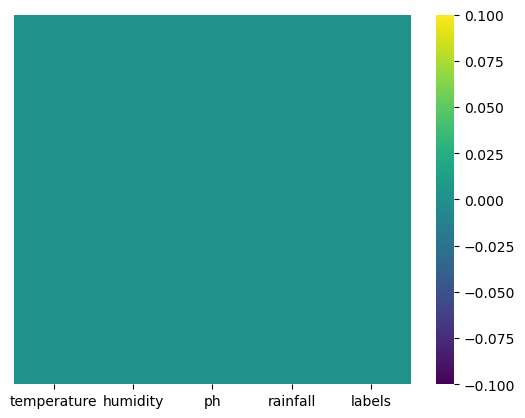

In [10]:
#creating a heatmap using the seaborn library
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

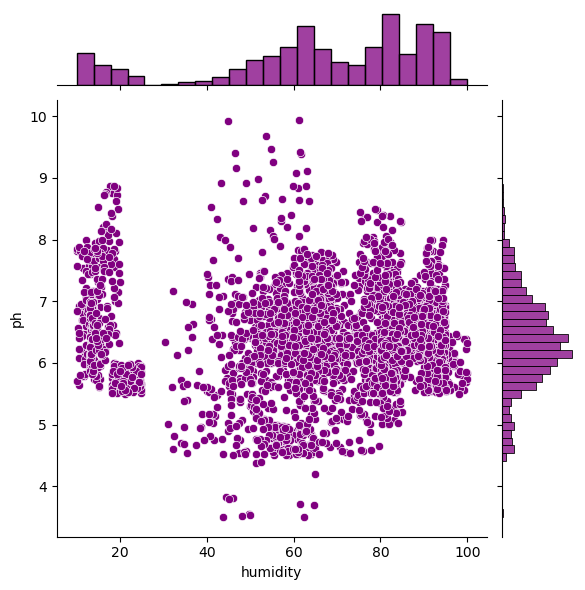

In [11]:
#creating a jointplot for specific factors (humidity / ph)
sns.jointplot(data=df,x='humidity',y='ph',color='purple')

<AxesSubplot:xlabel='temperature', ylabel='Density'>

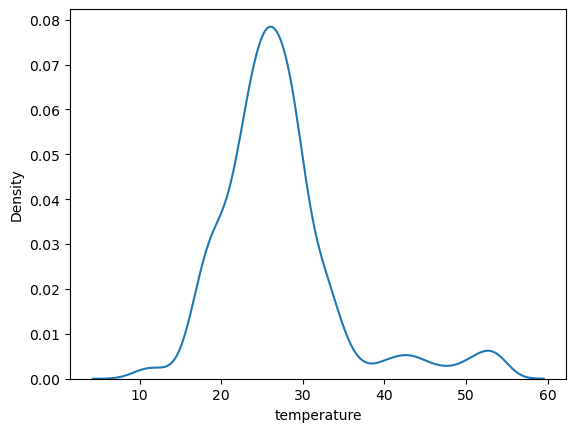

In [12]:
#visualizing the effect of temperature over on the dataset
sns.kdeplot(df['temperature'])

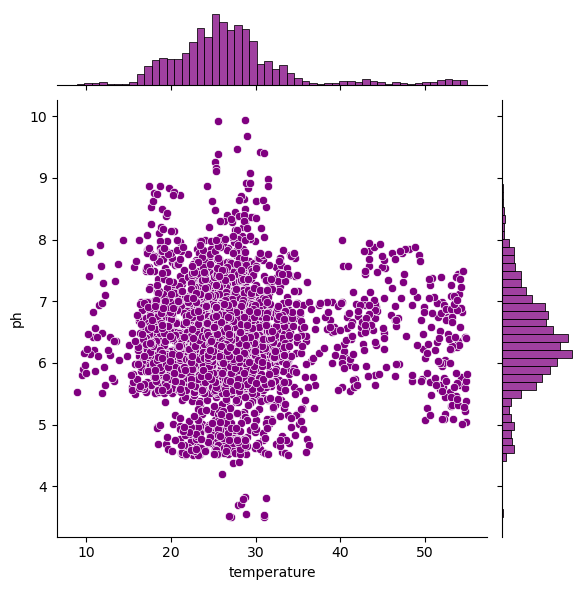

In [13]:
sns.jointplot(data=df,x='temperature',y='ph',color='purple')

<AxesSubplot:ylabel='Frequency'>

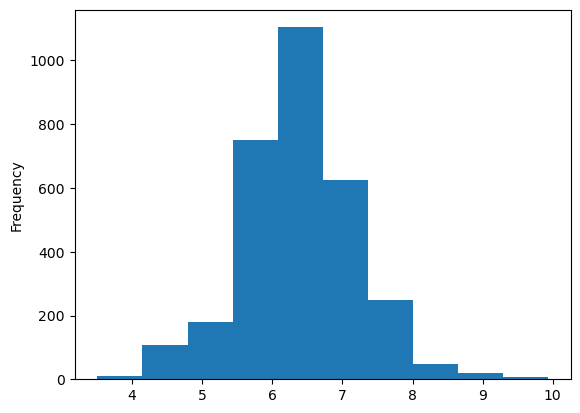

In [14]:
df["ph"].plot.hist()

In [15]:
new= df.drop('rainfall',axis=1)

In [17]:
new

,temperature,humidity,ph,labels
0,20.879744,82.002744,6.502985,rice
1,21.770462,80.319644,7.038096,rice
2,23.004459,82.320763,7.840207,rice
3,26.491096,80.158363,6.980401,rice
4,20.130175,81.604873,7.628473,rice
...,...,...,...,...
3095,25.287846,89.636679,6.765095,watermelon
3096,26.638386,84.695469,6.189214,watermelon
3097,25.331045,84.305338,6.904242,watermelon
3098,26.897502,83.892415,6.463271,watermelon


# Training the dataset 

In [23]:
#load the libraries
from sklearn.model_selection import train_test_split

In [24]:
X = new.drop('labels',axis=1)
y = new['labels']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision tree

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dtree = DecisionTreeClassifier()

In [38]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
rf_prediction = dtree.predict(X_test)

In [40]:
dtree.predict([[20.8,82.0,6.5]])[0]

C:\Users\ckaus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'rice'

In [47]:
predictions=dtree.predict(X_test)

In [48]:
import pickle

In [49]:
file=open('crop_pred_dtree.pkl','wb')
pickle.dump(dtree,file)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        33
  Black gram       0.67      0.67      0.67        27
    Chickpea       1.00      0.94      0.97        34
     Coconut       0.62      0.93      0.74        28
      Coffee       0.44      0.44      0.44        27
      Cotton       0.48      0.50      0.49        24
  Ground Nut       0.95      0.78      0.86        23
        Jute       0.53      0.45      0.49        40
Kidney Beans       0.94      1.00      0.97        29
      Lentil       0.34      0.42      0.38        24
  Moth Beans       0.57      0.59      0.58        22
   Mung Bean       0.91      0.83      0.87        35
        Peas       1.00      1.00      1.00        23
 Pigeon Peas       0.57      0.59      0.58        27
      Rubber       0.71      0.52      0.60        33
   Sugarcane       0.47      0.54      0.50        28
         Tea       0.80      0.97      0.88        33
     Tobacco       0.69    

<AxesSubplot:>

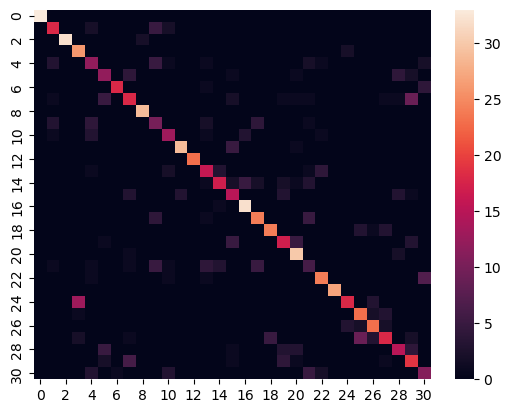

In [52]:
y_predict_test=dtree.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm)

In [53]:
print("Accuracy_DecisionTree:",accuracy_score(y_test,y_predict_test))

Accuracy_DecisionTree: 0.6795698924731183


# Random forest classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
clf=RandomForestClassifier()

In [64]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
input_features=[20.8,82.0,6.5]
infprob=clf.predict([input_features])[0]
infprob

C:\Users\ckaus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


'rice'

In [66]:
predictions=clf.predict(X_test)

In [67]:
file=open('crop_pred_rand.pkl','wb')
pickle.dump(clf,file)

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        33
  Black gram       0.81      0.81      0.81        27
    Chickpea       1.00      0.97      0.99        34
     Coconut       0.76      0.93      0.84        28
      Coffee       0.48      0.48      0.48        27
      Cotton       0.50      0.54      0.52        24
  Ground Nut       0.95      0.87      0.91        23
        Jute       0.58      0.35      0.44        40
Kidney Beans       0.97      1.00      0.98        29
      Lentil       0.38      0.42      0.40        24
  Moth Beans       0.83      0.68      0.75        22
   Mung Bean       0.91      0.91      0.91        35
        Peas       1.00      1.00      1.00        23
 Pigeon Peas       0.76      0.48      0.59        27
      Rubber       0.71      0.61      0.66        33
   Sugarcane       0.77      0.61      0.68        28
         Tea       0.86      0.97      0.91        33
     Tobacco       0.72    

<AxesSubplot:>

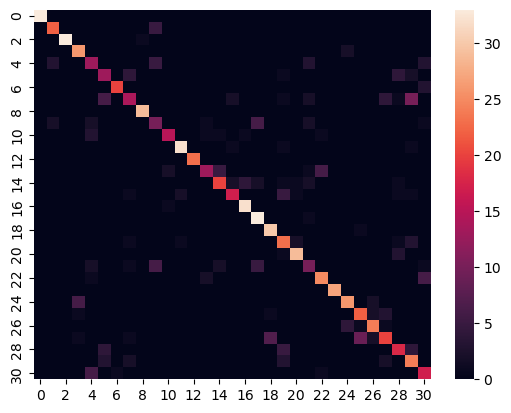

In [69]:
y_predict=clf.predict(X_test)
cm=confusion_matrix(y_test,y_predict)
sns.heatmap(cm)

In [70]:
print("Accuracy_RandomForest:",accuracy_score(y_test,y_predict))

Accuracy_RandomForest: 0.7451612903225806


# KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3 )  
knn.fit(X_train, y_train) 

KNeighborsClassifier(p=3)

In [72]:
KNNINT=[20.8,82.0,1.3]
result=knn.predict([KNNINT])[0]
result

C:\Users\ckaus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ckaus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


'rice'

In [73]:
knnprediction=knn.predict(X_test)

C:\Users\ckaus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [74]:
file=open('crop_pred_knn.pkl','wb')
pickle.dump(knn,file)

In [75]:
print(classification_report(y_test,knnprediction))

              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        33
  Black gram       0.53      0.70      0.60        27
    Chickpea       1.00      0.94      0.97        34
     Coconut       0.62      0.82      0.71        28
      Coffee       0.52      0.63      0.57        27
      Cotton       0.38      0.58      0.46        24
  Ground Nut       0.51      0.78      0.62        23
        Jute       0.46      0.28      0.34        40
Kidney Beans       0.97      1.00      0.98        29
      Lentil       0.34      0.50      0.41        24
  Moth Beans       0.53      0.36      0.43        22
   Mung Bean       0.78      0.89      0.83        35
        Peas       0.96      1.00      0.98        23
 Pigeon Peas       0.86      0.44      0.59        27
      Rubber       0.60      0.18      0.28        33
   Sugarcane       0.59      0.46      0.52        28
         Tea       0.76      0.94      0.84        33
     Tobacco       0.51    

C:\Users\ckaus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<AxesSubplot:>

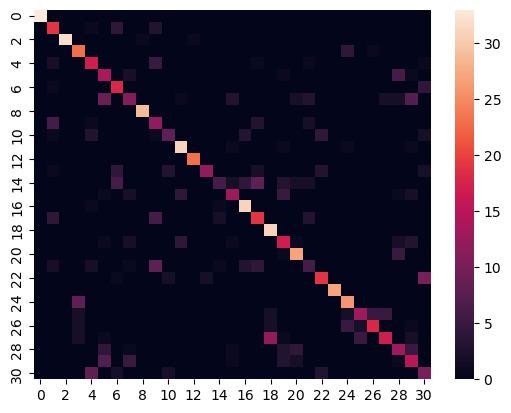

In [76]:
y_predict=knn.predict(X_test)
knncm=confusion_matrix(y_test,y_predict)
sns.heatmap(knncm)

In [78]:
print("Accuracy_KNN:",accuracy_score(y_test,y_predict))

Accuracy_KNN: 0.6344086021505376


# SVM

In [79]:
from sklearn.svm import SVC # "Support vector classifier"  
svc = SVC(kernel='linear', random_state=0)  
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [80]:
SVC=[26.986037,89.413849,6.260839]
results=svc.predict([SVC])[0]
results

C:\Users\ckaus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


'watermelon'

In [81]:
svcprediction=svc.predict(X_test)

In [82]:
file=open('crop_pred_svc.pkl','wb')
pickle.dump(svc,file)

In [84]:
print(classification_report(y_test,svcprediction))

              precision    recall  f1-score   support

Adzuki Beans       1.00      1.00      1.00        33
  Black gram       0.69      0.74      0.71        27
    Chickpea       1.00      1.00      1.00        34
     Coconut       0.80      0.86      0.83        28
      Coffee       0.48      0.37      0.42        27
      Cotton       0.50      0.62      0.56        24
  Ground Nut       0.78      0.91      0.84        23
        Jute       0.52      0.28      0.36        40
Kidney Beans       1.00      1.00      1.00        29
      Lentil       0.29      0.29      0.29        24
  Moth Beans       0.38      0.23      0.29        22
   Mung Bean       0.83      0.69      0.75        35
        Peas       1.00      1.00      1.00        23
 Pigeon Peas       0.55      0.41      0.47        27
      Rubber       0.68      0.58      0.62        33
   Sugarcane       0.61      0.50      0.55        28
         Tea       0.79      1.00      0.88        33
     Tobacco       0.61    

<AxesSubplot:>

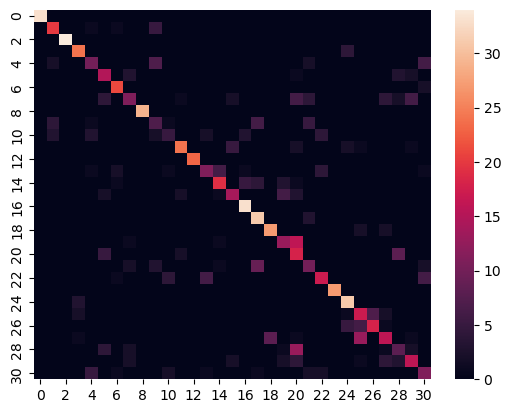

In [85]:
y_predict=svc.predict(X_test)
svccm=confusion_matrix(y_test,y_predict)
sns.heatmap(svccm)

In [86]:
print("Total Accuracy SVC:",accuracy_score(y_test,y_predict))

Total Accuracy SVC: 0.6376344086021506
